# TCC - BASE 3 - Rede Neural
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento - 20 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE3_ETAPA3_v1.csv*

In [77]:
data = pd.read_csv('BASE3_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

CLASSE_FLANGE    NPSH SELAGEM  ... VAZAO   id VALOR_REFERENCIA
0        NENHUM  NENHUM  NENHUM  ...   4.5  1.0         13459.10
1        NENHUM  NENHUM  NENHUM  ...   4.5  2.0         13459.10
2        NENHUM  NENHUM  NENHUM  ...  17.0  3.0         16174.10
3        NENHUM  NENHUM  NENHUM  ...  17.0  4.0         34587.23
4        NENHUM  NENHUM  NENHUM  ...  20.0  5.0         29867.99

[5 rows x 23 columns]

*Análise exploratória da base*

In [78]:
data.shape

(324, 23)

In [79]:
data.columns

Index(['CLASSE_FLANGE', 'NPSH', 'SELAGEM', 'TEMPERATURA_OPER', 'ACIONADOR',
       'AREA_APLICA', 'CERTIF_CONFORMIDADE', 'DIM_733', 'API_610', 'FLUIDO',
       'GRAU_PROTE', 'GRUPO_GASES', 'NORMA_PGBF', 'PROTE_CLASSIFICADA',
       'ESTAGIO', 'SELAGEM.1', 'PADRAO_CONSTRUTIVO', 'TIPO_BOMBA', 'ROTOR',
       'PRESSAO', 'VAZAO', 'id', 'VALOR_REFERENCIA'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLASSE_FLANGE        324 non-null    object 
 1   NPSH                 324 non-null    object 
 2   SELAGEM              324 non-null    object 
 3   TEMPERATURA_OPER     324 non-null    object 
 4   ACIONADOR            324 non-null    object 
 5   AREA_APLICA          324 non-null    object 
 6   CERTIF_CONFORMIDADE  324 non-null    object 
 7   DIM_733              324 non-null    object 
 8   API_610              324 non-null    object 
 9   FLUIDO               324 non-null    object 
 10  GRAU_PROTE           324 non-null    object 
 11  GRUPO_GASES          324 non-null    object 
 12  NORMA_PGBF           324 non-null    object 
 13  PROTE_CLASSIFICADA   324 non-null    object 
 14  ESTAGIO              324 non-null    int64  
 15  SELAGEM.1            324 non-null    obj

In [81]:
data.isnull().sum()

CLASSE_FLANGE          0
NPSH                   0
SELAGEM                0
TEMPERATURA_OPER       0
ACIONADOR              0
AREA_APLICA            0
CERTIF_CONFORMIDADE    0
DIM_733                0
API_610                0
FLUIDO                 0
GRAU_PROTE             0
GRUPO_GASES            0
NORMA_PGBF             0
PROTE_CLASSIFICADA     0
ESTAGIO                0
SELAGEM.1              0
PADRAO_CONSTRUTIVO     0
TIPO_BOMBA             0
ROTOR                  0
PRESSAO                0
VAZAO                  0
id                     0
VALOR_REFERENCIA       0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 20 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [82]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [83]:
data = pd.get_dummies(data, drop_first=True)

In [84]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

*Visualização de histograma*

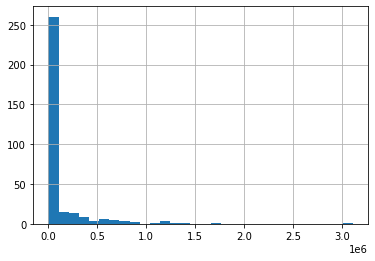

In [85]:
data['VALOR_REFERENCIA'].hist(bins = 30)

*Visualização da base*

In [86]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

In [87]:
data.shape

(324, 203)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [88]:
kmeans = KMeans(n_clusters=20, random_state=seed)
kmeans = kmeans.fit(data)

In [89]:
kmeans.labels_

array([19, 19, 19,  7,  7, 12, 12,  4,  4,  5, 14,  7, 19, 19,  7, 19, 19,
       19, 14, 14, 19, 14,  0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 14,  7,
        0,  0,  0,  0,  0,  0, 19,  0, 19, 14,  0,  0,  7, 17, 18,  9,  6,
       10,  2, 11,  6,  0,  7,  5,  0,  0, 19,  7,  7,  0,  0, 16,  0,  0,
        0,  7,  7,  0,  5, 16,  4, 12,  4,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 19, 19, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  7, 19,
       19, 14, 19, 19, 14,  0,  0, 19,  0, 19, 19, 19,  7, 19,  5,  5,  7,
       14, 14, 14, 14, 14,  7,  7,  7,  7,  7, 14, 14, 14, 14, 19, 19, 19,
       19,  7,  7,  0,  7, 14, 14,  7,  0,  0,  0, 12, 19,  0, 19,  0, 13,
        5,  0,  0,  4, 13, 14, 11,  5, 13, 19,  7, 14,  7, 14,  0,  0,  0,
        0,  0, 19, 19,  4, 19, 19, 19,  0,  0,  0,  0,  0, 19,  0,  7,  0,
        0,  0, 19,  0,  0,  0,  3,  7,  0,  0,  7,  9,  0,  7,  7,  7, 14,
       14,  7,  7,  8, 17, 17, 19, 19,  0,  7, 11,  7,  7,  7, 19, 14,  2,
       18, 14, 19,  5, 19

In [90]:
data['labels'] = kmeans.labels_

In [91]:
data.head()

ESTAGIO  PRESSAO  VAZAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES  labels
0        1     6.33    4.5  ...                       0                    0      19
1        1     6.33    4.5  ...                       0                    0      19
2       22     8.00   17.0  ...                       0                    0      19
3        1     2.40   17.0  ...                       0                    0       7
4        1     1.50   20.0  ...                       0                    0       7

[5 rows x 204 columns]

In [92]:
data['labels'] = data['labels'].astype('category')

In [93]:
data = data.drop(columns=['VALOR_REFERENCIA'])

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 203 entries, ESTAGIO to labels
dtypes: category(1), float64(2), int64(1), uint8(199)
memory usage: 71.8 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [95]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 20 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 202)
(65, 202)
(259,)
(65,)


*Normalizando os Dados*

In [97]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.38365231, -0.85733461, -0.41383086, -0.06225728, -0.06225728,
        -0.12524486, -0.3754586 , -0.08821622, -0.06225728, -0.18973666,
         0.        ,  0.53717522, -0.06225728, -0.08821622, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.10825318, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.12524486, -0.06225728, -0.06225728,
        -0.08821622, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.14030338, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728,  0.21060588,
        11.33578405, -0.06225728, -0.06225728,  0.        , -0.10825318,
        -0.06225728, -0.28136572, -0.06225728, -0.10825318, -0.08821622,
        -0.06225728, -0.17852874, -0.08821622, -0.10825318, -0.10825318,
        -0.08821622, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.14030338, -0.06225728, -0.0

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [98]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(202,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(20,activation = 'sigmoid'))
RN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 202)               41006     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                4060      
Total params: 45,066
Trainable params: 45,066
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [99]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.0116
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.0116
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.0116
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.0116
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.0116
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.0116
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.0116
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.0154
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.0154
Epoch 10/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.0193
Epoch 11/500
9/9 [===========

*Teste da rede neural*

In [100]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.14349202811717987
Test mape: 0.35384616255760193


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [101]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [102]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

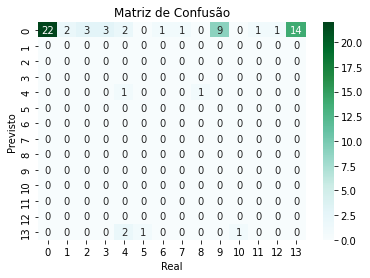

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 10 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE3_ETAPA3_v1.csv*

In [105]:
data = pd.read_csv('BASE3_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

CLASSE_FLANGE    NPSH SELAGEM  ... VAZAO   id VALOR_REFERENCIA
0        NENHUM  NENHUM  NENHUM  ...   4.5  1.0         13459.10
1        NENHUM  NENHUM  NENHUM  ...   4.5  2.0         13459.10
2        NENHUM  NENHUM  NENHUM  ...  17.0  3.0         16174.10
3        NENHUM  NENHUM  NENHUM  ...  17.0  4.0         34587.23
4        NENHUM  NENHUM  NENHUM  ...  20.0  5.0         29867.99

[5 rows x 23 columns]

*Análise exploratória da base*

In [106]:
data.shape

(324, 23)

In [107]:
data.columns

Index(['CLASSE_FLANGE', 'NPSH', 'SELAGEM', 'TEMPERATURA_OPER', 'ACIONADOR',
       'AREA_APLICA', 'CERTIF_CONFORMIDADE', 'DIM_733', 'API_610', 'FLUIDO',
       'GRAU_PROTE', 'GRUPO_GASES', 'NORMA_PGBF', 'PROTE_CLASSIFICADA',
       'ESTAGIO', 'SELAGEM.1', 'PADRAO_CONSTRUTIVO', 'TIPO_BOMBA', 'ROTOR',
       'PRESSAO', 'VAZAO', 'id', 'VALOR_REFERENCIA'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLASSE_FLANGE        324 non-null    object 
 1   NPSH                 324 non-null    object 
 2   SELAGEM              324 non-null    object 
 3   TEMPERATURA_OPER     324 non-null    object 
 4   ACIONADOR            324 non-null    object 
 5   AREA_APLICA          324 non-null    object 
 6   CERTIF_CONFORMIDADE  324 non-null    object 
 7   DIM_733              324 non-null    object 
 8   API_610              324 non-null    object 
 9   FLUIDO               324 non-null    object 
 10  GRAU_PROTE           324 non-null    object 
 11  GRUPO_GASES          324 non-null    object 
 12  NORMA_PGBF           324 non-null    object 
 13  PROTE_CLASSIFICADA   324 non-null    object 
 14  ESTAGIO              324 non-null    int64  
 15  SELAGEM.1            324 non-null    obj

In [109]:
data.isnull().sum()

CLASSE_FLANGE          0
NPSH                   0
SELAGEM                0
TEMPERATURA_OPER       0
ACIONADOR              0
AREA_APLICA            0
CERTIF_CONFORMIDADE    0
DIM_733                0
API_610                0
FLUIDO                 0
GRAU_PROTE             0
GRUPO_GASES            0
NORMA_PGBF             0
PROTE_CLASSIFICADA     0
ESTAGIO                0
SELAGEM.1              0
PADRAO_CONSTRUTIVO     0
TIPO_BOMBA             0
ROTOR                  0
PRESSAO                0
VAZAO                  0
id                     0
VALOR_REFERENCIA       0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 10 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [110]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [111]:
data = pd.get_dummies(data, drop_first=True)

In [112]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

*Visualização de histograma*

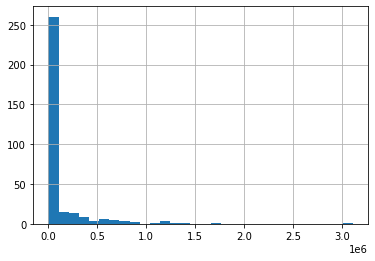

In [113]:
data['VALOR_REFERENCIA'].hist(bins = 30)

*Visualização da base*

In [114]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

In [115]:
data.shape

(324, 203)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [116]:
kmeans = KMeans(n_clusters=10, random_state=seed)
kmeans = kmeans.fit(data)

In [117]:
kmeans.labels_

array([0, 0, 0, 6, 6, 4, 4, 9, 9, 4, 6, 6, 0, 0, 6, 0, 0, 0, 6, 6, 0, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 6, 7, 2, 2, 1, 8, 7, 9, 1, 0, 6, 4, 0, 0, 0, 6, 6, 0, 0, 4,
       0, 0, 0, 6, 6, 0, 4, 4, 9, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 6, 6, 0, 6, 6, 6, 6, 0, 0, 0, 9, 0, 0, 0, 0, 4, 4,
       0, 0, 9, 4, 6, 9, 4, 4, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 9, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 6,
       2, 0, 6, 6, 6, 6, 6, 6, 6, 5, 7, 7, 0, 0, 0, 6, 9, 6, 6, 6, 0, 6,
       7, 2, 6, 0, 4, 0, 6, 6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 6, 6, 6, 6,
       6, 8, 9, 0, 6, 0, 7, 6, 6, 5, 6, 0, 4, 0, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 6, 9, 6, 6, 6, 0, 0, 0, 0, 7, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 4, 4, 4, 0, 6, 6, 0, 4, 0,

In [118]:
data['labels'] = kmeans.labels_

In [119]:
data.head()

ESTAGIO  PRESSAO  VAZAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES  labels
0        1     6.33    4.5  ...                       0                    0       0
1        1     6.33    4.5  ...                       0                    0       0
2       22     8.00   17.0  ...                       0                    0       0
3        1     2.40   17.0  ...                       0                    0       6
4        1     1.50   20.0  ...                       0                    0       6

[5 rows x 204 columns]

In [120]:
data['labels'] = data['labels'].astype('category')

In [121]:
data = data.drop(columns=['VALOR_REFERENCIA'])

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 203 entries, ESTAGIO to labels
dtypes: category(1), float64(2), int64(1), uint8(199)
memory usage: 71.4 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [123]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 10 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 202)
(65, 202)
(259,)
(65,)


*Normalizando os Dados*

In [125]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.38365231, -0.85733461, -0.41383086, -0.06225728, -0.06225728,
        -0.12524486, -0.3754586 , -0.08821622, -0.06225728, -0.18973666,
         0.        ,  0.53717522, -0.06225728, -0.08821622, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.10825318, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.12524486, -0.06225728, -0.06225728,
        -0.08821622, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.14030338, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728,  0.21060588,
        11.33578405, -0.06225728, -0.06225728,  0.        , -0.10825318,
        -0.06225728, -0.28136572, -0.06225728, -0.10825318, -0.08821622,
        -0.06225728, -0.17852874, -0.08821622, -0.10825318, -0.10825318,
        -0.08821622, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.14030338, -0.06225728, -0.0

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [126]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(202,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(10,activation = 'sigmoid'))
RN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 202)               41006     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2030      
Total params: 43,036
Trainable params: 43,036
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [127]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 2ms/step - loss: 0.8226 - accuracy: 0.1931
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.2046
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.2085
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.2201
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.2432
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.2355
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.2703
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.3822
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.5212
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.3669 - accuracy: 0.4826
Epoch 11/500
9/9 [===========

*Teste da rede neural*

In [128]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.17199499905109406
Test mape: 0.692307710647583


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [129]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [130]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

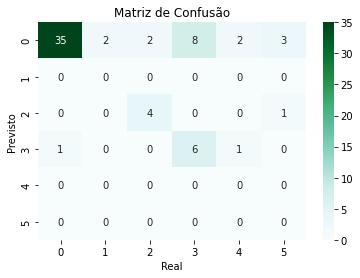

In [131]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 5 classes</font> - Só foi possível usar 4 classes
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE3_ETAPA3_v1.csv*

In [158]:
data = pd.read_csv('BASE3_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

CLASSE_FLANGE    NPSH SELAGEM  ... VAZAO   id VALOR_REFERENCIA
0        NENHUM  NENHUM  NENHUM  ...   4.5  1.0         13459.10
1        NENHUM  NENHUM  NENHUM  ...   4.5  2.0         13459.10
2        NENHUM  NENHUM  NENHUM  ...  17.0  3.0         16174.10
3        NENHUM  NENHUM  NENHUM  ...  17.0  4.0         34587.23
4        NENHUM  NENHUM  NENHUM  ...  20.0  5.0         29867.99

[5 rows x 23 columns]

*Análise exploratória da base*

In [159]:
data.shape

(324, 23)

In [160]:
data.columns

Index(['CLASSE_FLANGE', 'NPSH', 'SELAGEM', 'TEMPERATURA_OPER', 'ACIONADOR',
       'AREA_APLICA', 'CERTIF_CONFORMIDADE', 'DIM_733', 'API_610', 'FLUIDO',
       'GRAU_PROTE', 'GRUPO_GASES', 'NORMA_PGBF', 'PROTE_CLASSIFICADA',
       'ESTAGIO', 'SELAGEM.1', 'PADRAO_CONSTRUTIVO', 'TIPO_BOMBA', 'ROTOR',
       'PRESSAO', 'VAZAO', 'id', 'VALOR_REFERENCIA'],
      dtype='object')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLASSE_FLANGE        324 non-null    object 
 1   NPSH                 324 non-null    object 
 2   SELAGEM              324 non-null    object 
 3   TEMPERATURA_OPER     324 non-null    object 
 4   ACIONADOR            324 non-null    object 
 5   AREA_APLICA          324 non-null    object 
 6   CERTIF_CONFORMIDADE  324 non-null    object 
 7   DIM_733              324 non-null    object 
 8   API_610              324 non-null    object 
 9   FLUIDO               324 non-null    object 
 10  GRAU_PROTE           324 non-null    object 
 11  GRUPO_GASES          324 non-null    object 
 12  NORMA_PGBF           324 non-null    object 
 13  PROTE_CLASSIFICADA   324 non-null    object 
 14  ESTAGIO              324 non-null    int64  
 15  SELAGEM.1            324 non-null    obj

In [162]:
data.isnull().sum()

CLASSE_FLANGE          0
NPSH                   0
SELAGEM                0
TEMPERATURA_OPER       0
ACIONADOR              0
AREA_APLICA            0
CERTIF_CONFORMIDADE    0
DIM_733                0
API_610                0
FLUIDO                 0
GRAU_PROTE             0
GRUPO_GASES            0
NORMA_PGBF             0
PROTE_CLASSIFICADA     0
ESTAGIO                0
SELAGEM.1              0
PADRAO_CONSTRUTIVO     0
TIPO_BOMBA             0
ROTOR                  0
PRESSAO                0
VAZAO                  0
id                     0
VALOR_REFERENCIA       0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 5 classes</font> - Só foi possível usar 4 classes
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [163]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [164]:
data = pd.get_dummies(data, drop_first=True)

In [165]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

*Visualização de histograma*

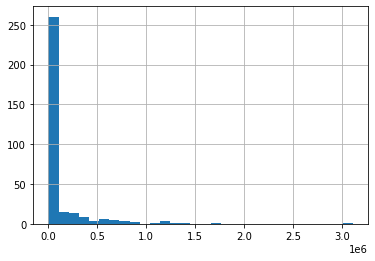

In [166]:
data['VALOR_REFERENCIA'].hist(bins = 30)

*Visualização da base*

In [167]:
data.head()

ESTAGIO  PRESSAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES
0        1     6.33  ...                       0                    0
1        1     6.33  ...                       0                    0
2       22     8.00  ...                       0                    0
3        1     2.40  ...                       0                    0
4        1     1.50  ...                       0                    0

[5 rows x 203 columns]

In [168]:
data.shape

(324, 203)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [169]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans = kmeans.fit(data)

In [170]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 1, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [171]:
data['labels'] = kmeans.labels_

In [172]:
data.head()

ESTAGIO  PRESSAO  VAZAO  ...  ROTOR_ROTOR SEMI-AXIAL  ROTOR_ROTOR SIMPLES  labels
0        1     6.33    4.5  ...                       0                    0       0
1        1     6.33    4.5  ...                       0                    0       0
2       22     8.00   17.0  ...                       0                    0       0
3        1     2.40   17.0  ...                       0                    0       0
4        1     1.50   20.0  ...                       0                    0       0

[5 rows x 204 columns]

In [173]:
data['labels'] = data['labels'].astype('category')

In [174]:
data = data.drop(columns=['VALOR_REFERENCIA'])

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 203 entries, ESTAGIO to labels
dtypes: category(1), float64(2), int64(1), uint8(199)
memory usage: 71.2 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [176]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 5 classes</font> - Só foi possível usar 4 classes
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 202)
(65, 202)
(259,)
(65,)


*Normalizando os Dados*

In [178]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.38365231, -0.85733461, -0.41383086, -0.06225728, -0.06225728,
        -0.12524486, -0.3754586 , -0.08821622, -0.06225728, -0.18973666,
         0.        ,  0.53717522, -0.06225728, -0.08821622, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.10825318, -0.06225728, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.12524486, -0.06225728, -0.06225728,
        -0.08821622, -0.06225728, -0.06225728, -0.06225728, -0.06225728,
        -0.14030338, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.06225728, -0.06225728, -0.06225728,  0.21060588,
        11.33578405, -0.06225728, -0.06225728,  0.        , -0.10825318,
        -0.06225728, -0.28136572, -0.06225728, -0.10825318, -0.08821622,
        -0.06225728, -0.17852874, -0.08821622, -0.10825318, -0.10825318,
        -0.08821622, -0.06225728, -0.08821622, -0.06225728, -0.06225728,
        -0.06225728, -0.14030338, -0.06225728, -0.0

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [179]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(202,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(4,activation = 'sigmoid'))
RN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 202)               41006     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 812       
Total params: 41,818
Trainable params: 41,818
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [180]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.3089
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7992
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8880
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8880
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8880
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8880
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.8880
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.8880
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8880
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.8880
Epoch 11/500
9/9 [===========

*Teste da rede neural*

In [181]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.1652447134256363
Test mape: 0.8769230842590332


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [182]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [183]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

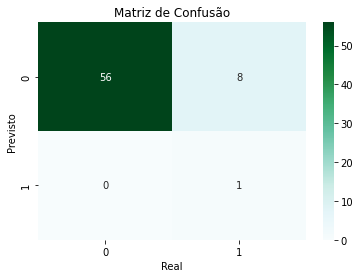

In [184]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()